In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [89]:
np.random.seed(42)

# Part (a)

$C_n=(\hat p_n - \epsilon_n, \hat p_n + \epsilon_n)$ contains $p$ exactly if $|\hat p_n - p| < \epsilon$. Thus by Hoeffding,
$$\mathbb P(C_n \text{ contains } p) \geq 1 - 2e^{-2n\epsilon_n^2} = 1 - 2e^{-\log(2/\alpha)}=1-\alpha.$$

# Part (b)

For each $n$ from $1$ to $10000$ we will simulate $\hat p_n$ $10000$ times. For each such simulation, we will test whether $C_n$ contains $p$. Taking the average over those $10000$ simulations for $\hat p_n$ will give us the coverage for $n$. Finally we will plot the coverage versus $n$.

In [90]:
p = 0.4

In [91]:
alpha = 0.05

In [92]:
B = 10000

In [93]:
n = 10000

In [94]:
eps = np.array([np.sqrt(np.log(2/alpha)/(2*i)) for i in range(1,n+1)])

In [95]:
percent_coverages = np.empty(n)

In [96]:
for i in range(1, n+1):
    binomial = binom.rvs(n=i, p=p, size=B)
    p_hat = binomial / i
    contains_p = (np.abs(p_hat - p) < eps[i-1]).astype(int)
    percent_coverages[i-1] = np.mean(contains_p)

Text(0.5, 1.0, 'Coverage over 10000 simulations for n from 1 to 10000')

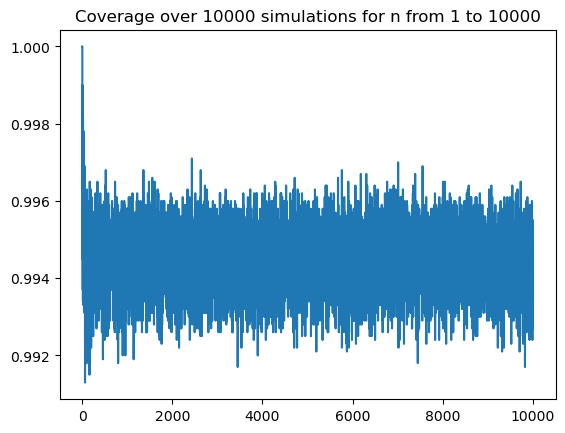

In [99]:
plt.plot(range(1,n+1), percent_coverages)
plt.title('Coverage over 10000 simulations for n from 1 to 10000')

The graph is extremely chaotic but you can see that coverage tends to be about $0.995$ (as expected) regardless of $n$, at least assuming $n$ to be sufficiently large.

# Part (c)

In [100]:
x = np.arange(1,10000,1)

In [101]:
y = 2*np.sqrt(1/(2*x)*np.log(2/alpha))

Text(0.5, 1.0, 'Length of interval versus n')

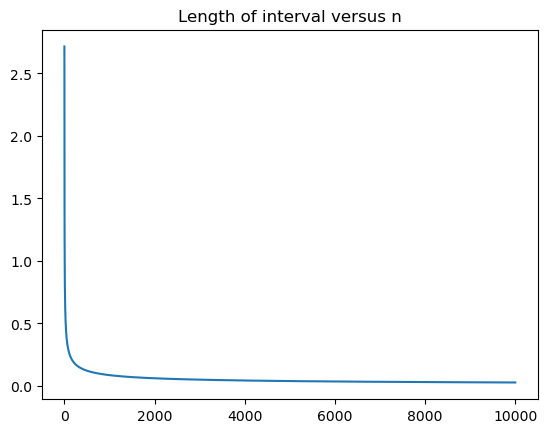

In [102]:
plt.plot(x, y)
plt.title('Length of interval versus n')

In [103]:
np.argmax(y < .05)

2951

Thus, the first $n$ for which $\epsilon_n<0.05$ is $n=2952$.